# onderzoeksvragen:

 - In hoeverre is de omzet van een film te voorspellen op basis van de populariteit op Facebook en IMDB zelf?
 - welke kenmerken van een film bepalen de imdb score?
 - Welke genres zijn over de loop van de jaren populairder geworden?
 - hoeveel invloed heeft de producent op de IMDB score?


In [33]:
# importeren van libaries voor het 'cleanen van de data'
import pandas as pd
import numpy as np
import os


In [34]:
# test om het bestand te lezen
df = pd.read_csv('moviedataset.csv')
# head eerste 5 regels van het bestand
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [35]:
# alle kollommen weergeven
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [36]:
# tabel die statistische weergaven geeft van de numerieke data
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


Nominale waarden: Color, director_name, actor_2_name, genres, actor_1_name, movie_title (unique), actor_3_name, plot_keywords, movie_imdb_link (unique), language, country, content_rating, aspect_ratio

Numerieke waarden: 
- num_critic_for_reviews, (float)
- duration, (float)
- director_facebook_likes, (float)
- actor_3_facebook_likes, (float)
- actor_1_facebook_likes, (float)
- gross, (float)
- num_voted_users, (int)
- cast_total_facebook_likes, (float)
- facenumber_in_poster, (int)
- num_user_for_reviews, (float)
- budget, (float)(float)
- title_year, (float)
- actor_2_facebook_likes, (float)
- imdb_score, (float)
- movie_facebook_likes (int)

Elke waarde dat uniek is tot de film kan buiten beschouwing worden gelaten.

In [37]:
# tabel voor film kenmerken
df[['color','movie_title','director_name','duration','genres','plot_keywords','language','country','content_rating','budget', 'title_year', 'aspect_ratio', 'imdb_score']]

,color,movie_title,director_name,duration,genres,plot_keywords,language,country,content_rating,budget,title_year,aspect_ratio,imdb_score
0,Color,Avatar,James Cameron,178.0,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,English,USA,PG-13,237000000.0,2009.0,1.78,7.9
1,Color,Pirates of the Caribbean: At World's End,Gore Verbinski,169.0,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,English,USA,PG-13,300000000.0,2007.0,2.35,7.1
2,Color,Spectre,Sam Mendes,148.0,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist,English,UK,PG-13,245000000.0,2015.0,2.35,6.8
3,Color,The Dark Knight Rises,Christopher Nolan,164.0,Action|Thriller,deception|imprisonment|lawlessness|police offi...,English,USA,PG-13,250000000.0,2012.0,2.35,8.5
4,NaN,Star Wars: Episode VII - The Force Awakens ...,Doug Walker,NaN,Documentary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Signed Sealed Delivered,Scott Smith,87.0,Comedy|Drama,fraud|postal worker|prison|theft|trial,English,Canada,NaN,NaN,2013.0,NaN,7.7
5039,Color,The Following,NaN,43.0,Crime|Drama|Mystery|Thriller,cult|fbi|hideout|prison escape|serial killer,English,USA,TV-14,NaN,NaN,16.00,7.5
5040,Color,A Plague So Pleasant,Benjamin Roberds,76.0,Drama|Horror|Thriller,NaN,English,USA,NaN,1400.0,2013.0,NaN,6.3
5041,Color,Shanghai Calling,Daniel Hsia,100.0,Comedy|Drama|Romance,NaN,English,USA,PG-13,NaN,2012.0,2.35,6.3


In [38]:
#tabel voor omzet en genres
df [['genres', 'movie_title','title_year','imdb_score', 'gross']]

,genres,movie_title,title_year,imdb_score,gross
0,Action|Adventure|Fantasy|Sci-Fi,Avatar,2009.0,7.9,760505847.0
1,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,2007.0,7.1,309404152.0
2,Action|Adventure|Thriller,Spectre,2015.0,6.8,200074175.0
3,Action|Thriller,The Dark Knight Rises,2012.0,8.5,448130642.0
4,Documentary,Star Wars: Episode VII - The Force Awakens ...,NaN,7.1,NaN
...,...,...,...,...,...
5038,Comedy|Drama,Signed Sealed Delivered,2013.0,7.7,NaN
5039,Crime|Drama|Mystery|Thriller,The Following,NaN,7.5,NaN
5040,Drama|Horror|Thriller,A Plague So Pleasant,2013.0,6.3,NaN
5041,Comedy|Drama|Romance,Shanghai Calling,2012.0,6.3,10443.0


In [39]:
# tabel voor de eerste onderzoeks vraag
df[['movie_title','gross', 'director_name','director_facebook_likes','actor_1_name','actor_1_facebook_likes','actor_2_name','actor_2_facebook_likes','actor_3_name','actor_3_facebook_likes','cast_total_facebook_likes','movie_facebook_likes','num_critic_for_reviews','num_user_for_reviews','imdb_score']]

,movie_title,gross,director_name,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,imdb_score
0,Avatar,760505847.0,James Cameron,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,Wes Studi,855.0,4834,33000,723.0,3054.0,7.9
1,Pirates of the Caribbean: At World's End,309404152.0,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,1000.0,48350,0,302.0,1238.0,7.1
2,Spectre,200074175.0,Sam Mendes,0.0,Christoph Waltz,11000.0,Rory Kinnear,393.0,Stephanie Sigman,161.0,11700,85000,602.0,994.0,6.8
3,The Dark Knight Rises,448130642.0,Christopher Nolan,22000.0,Tom Hardy,27000.0,Christian Bale,23000.0,Joseph Gordon-Levitt,23000.0,106759,164000,813.0,2701.0,8.5
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Doug Walker,131.0,Doug Walker,131.0,Rob Walker,12.0,NaN,NaN,143,0,NaN,NaN,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,NaN,Scott Smith,2.0,Eric Mabius,637.0,Daphne Zuniga,470.0,Crystal Lowe,318.0,2283,84,1.0,6.0,7.7
5039,The Following,NaN,NaN,NaN,Natalie Zea,841.0,Valorie Curry,593.0,Sam Underwood,319.0,1753,32000,43.0,359.0,7.5
5040,A Plague So Pleasant,NaN,Benjamin Roberds,0.0,Eva Boehnke,0.0,Maxwell Moody,0.0,David Chandler,0.0,0,16,13.0,3.0,6.3
5041,Shanghai Calling,10443.0,Daniel Hsia,0.0,Alan Ruck,946.0,Daniel Henney,719.0,Eliza Coupe,489.0,2386,660,14.0,9.0,6.3


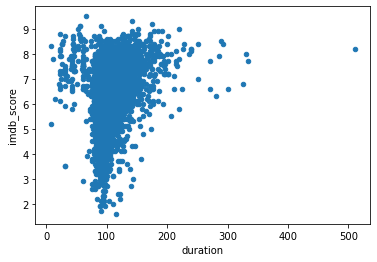

In [40]:
# test
df.plot.scatter(x='duration', y='imdb_score')

In [45]:
a.encode('utf-8').strip()
dataset2 = pd.read_csv("MoviesWithSequels.csv") 
dataset2.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 5: invalid start byte